In [2]:
import pandas as pd

# Load the raw data
df = pd.read_parquet('../data/consolidated_transactions.parquet')

# Display the first 5 rows
print("Data Head:")
display(df.head())

# Get a summary of the data types and null values
print("\nData Info:")
df.info()

# Get statistical summary
print("\nData Description:")
display(df.describe())

Data Head:


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288062 entries, 0 to 288061
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   TRANSACTION_ID     288062 non-null  int64         
 1   TX_DATETIME        288062 non-null  datetime64[ns]
 2   CUSTOMER_ID        288062 non-null  int64         
 3   TERMINAL_ID        288062 non-null  int64         
 4   TX_AMOUNT          288062 non-null  float64       
 5   TX_TIME_SECONDS    288062 non-null  int64         
 6   TX_TIME_DAYS       288062 non-null  int64         
 7   TX_FRAUD           288062 non-null  int64         
 8   TX_FRAUD_SCENARIO  288062 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 19.8 MB

Data Description:


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,288062.000000,288062,288062.000000,288062.000000,288062.000000,2.880620e+05,288062.000000,288062.000000,288062.000000
mean,144030.500000,2018-04-16 00:29:34.560455936,2505.286633,5001.002170,53.527261,1.297775e+06,14.520728,0.005908,0.013327
min,0.000000,2018-04-01 00:00:31,0.000000,0.000000,0.000000,3.100000e+01,0.000000,0.000000,0.000000
25%,72015.250000,2018-04-08 12:29:24.500000,1253.000000,2501.250000,20.990000,6.497645e+05,7.000000,0.000000,0.000000
50%,144030.500000,2018-04-16 02:25:37.500000,2509.000000,4999.000000,44.650000,1.304738e+06,15.000000,0.000000,0.000000
75%,216045.750000,2018-04-23 12:06:52.500000,3765.000000,7499.750000,76.910000,1.944412e+06,22.000000,0.000000,0.000000
max,288061.000000,2018-04-30 23:58:13,4999.000000,9999.000000,1039.300000,2.591893e+06,29.000000,1.000000,3.000000
std,83156.480959,NaN,1445.617050,2888.615846,41.824498,7.483949e+05,8.658834,0.076639,0.179369


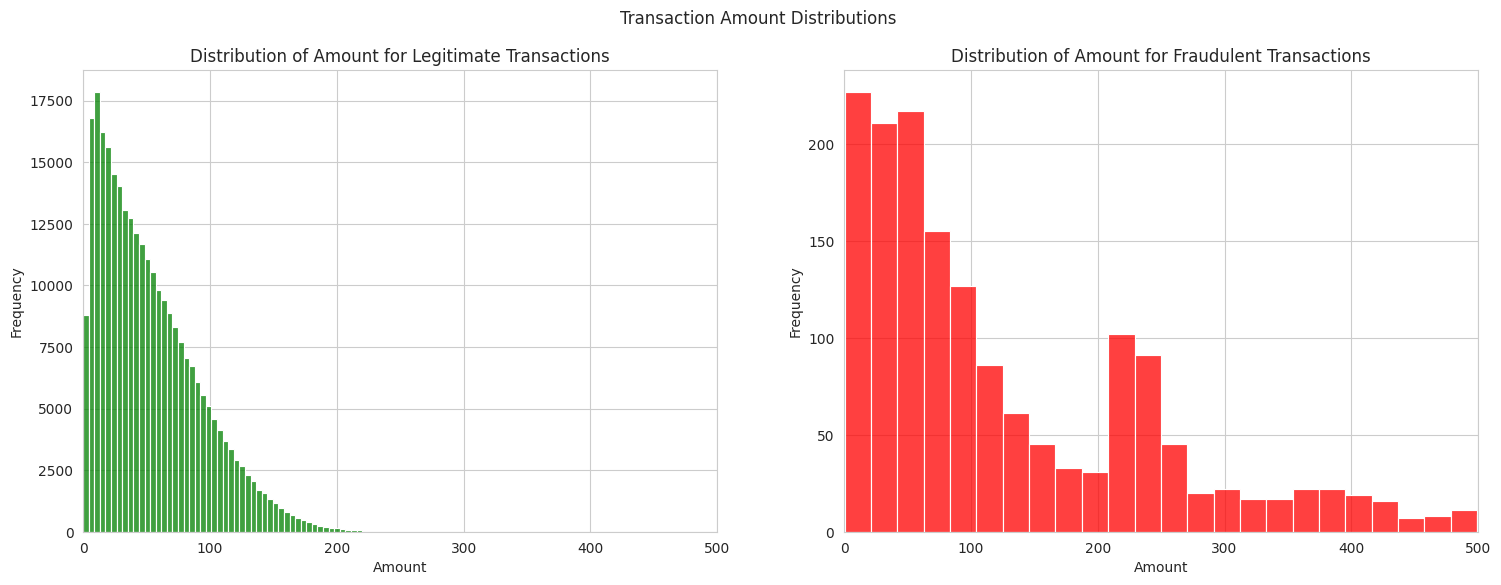

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# --- Visualization 1: Transaction Amount by Class ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the distribution of Amount for legitimate transactions
sns.histplot(df[df['TX_FRAUD'] == 0]['TX_AMOUNT'], bins=50, ax=ax1, color='g')
ax1.set_title('Distribution of Amount for Legitimate Transactions')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 500) # Zoom in on the majority of transactions

# Plot the distribution of Amount for fraudulent transactions
sns.histplot(df[df['TX_FRAUD'] == 1]['TX_AMOUNT'], bins=50, ax=ax2, color='r')
ax2.set_title('Distribution of Amount for Fraudulent Transactions')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, 500)

plt.suptitle('Transaction Amount Distributions')
plt.show()

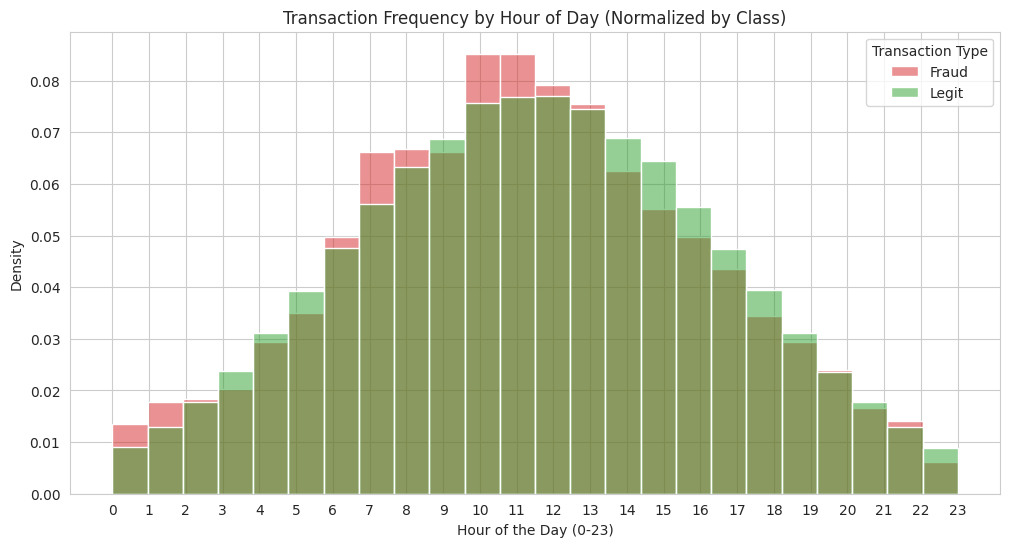

In [6]:
# --- Visualization 2: Transaction Timing by Class ---
df['HourOfDay'] = df['TX_DATETIME'].dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='HourOfDay', hue='TX_FRAUD', common_norm=False, bins=24, palette=['#2ca02c', '#d62728'], stat='density')
plt.title('Transaction Frequency by Hour of Day (Normalized by Class)')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Density')
plt.xticks(range(24))
plt.legend(title='Transaction Type', labels=['Fraud', 'Legit'])
plt.show()